## Claude AI prompt

### could you generate some tensorflow python code to show how you would implement a simple 2-step boosting ensemble method on a toy dataset?

## Response: 

### Certainly. I'll create a simple 2-step boosting ensemble method using TensorFlow on a toy dataset. This example will demonstrate the core concept of boosting where the second model focuses on correcting the errors of the first model.

### Here's the implementation:







7/7 [==============================] - 0s 666us/step
Model 1 Accuracy: 0.5028
Model 2 Accuracy: 0.4793
Ensemble Accuracy: 0.5224


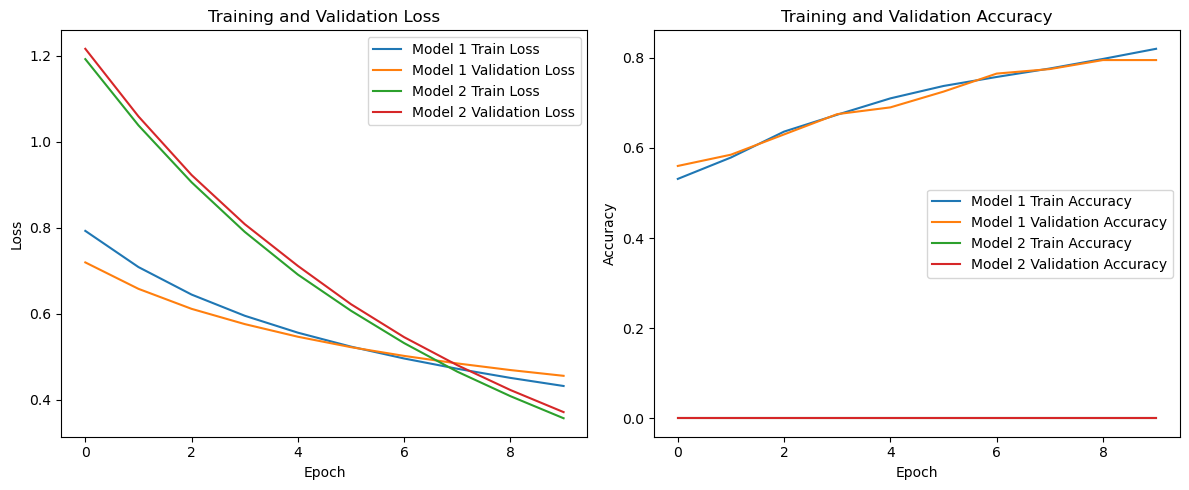

In [1]:
import tensorflow as tf
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Generate a toy dataset
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert to TensorFlow datasets
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train)).batch(32)
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(32)

# Define a simple model
def create_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(10, activation='relu', input_shape=(20,)),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Train the first model
model1 = create_model()
history1 = model1.fit(train_dataset, epochs=10, validation_data=test_dataset, verbose=0)

# Get predictions and errors from the first model
train_pred1 = model1.predict(X_train)
train_errors = y_train - train_pred1.flatten()

# Train the second model on the errors
model2 = create_model()
history2 = model2.fit(X_train, train_errors, epochs=10, validation_split=0.2, verbose=0)

# Ensemble prediction function
def ensemble_predict(X):
    pred1 = model1.predict(X)
    pred2 = model2.predict(X)
    return (pred1 + pred2 > 0.5).astype(int)

# Evaluate individual models and ensemble
y_pred1 = (model1.predict(X_test) > 0.5).astype(int)
y_pred2 = (model2.predict(X_test) > 0.5).astype(int)
y_pred_ensemble = ensemble_predict(X_test)

accuracy1 = np.mean(y_pred1 == y_test)
accuracy2 = np.mean(y_pred2 == y_test)
accuracy_ensemble = np.mean(y_pred_ensemble == y_test)

print(f"Model 1 Accuracy: {accuracy1:.4f}")
print(f"Model 2 Accuracy: {accuracy2:.4f}")
print(f"Ensemble Accuracy: {accuracy_ensemble:.4f}")

# Plot training progress
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history1.history['loss'], label='Model 1 Train Loss')
plt.plot(history1.history['val_loss'], label='Model 1 Validation Loss')
plt.plot(history2.history['loss'], label='Model 2 Train Loss')
plt.plot(history2.history['val_loss'], label='Model 2 Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.subplot(1, 2, 2)
plt.plot(history1.history['accuracy'], label='Model 1 Train Accuracy')
plt.plot(history1.history['val_accuracy'], label='Model 1 Validation Accuracy')
plt.plot(history2.history['accuracy'], label='Model 2 Train Accuracy')
plt.plot(history2.history['val_accuracy'], label='Model 2 Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.tight_layout()
plt.show()

This code demonstrates a simple 2-step boosting ensemble:

We create a toy classification dataset.
We define and train the first model (Model 1) on the original data.
We calculate the errors (residuals) from the first model's predictions.
We train the second model (Model 2) to predict these errors.
For the final prediction, we combine the outputs of both models. The second model's prediction is added to the first model's prediction to correct its errors.
We evaluate and compare the performance of individual models and the ensemble.
Finally, we plot the training progress of both models.

Key boosting concepts demonstrated:

Sequential learning: The second model is trained based on the performance of the first model.
Error correction: The second model focuses on the errors made by the first model.
Ensemble prediction: The final prediction combines the outputs of both models.

This simple example shows the core idea behind boosting: each subsequent model in the ensemble tries to correct the errors of the previous models. In a full gradient boosting implementation, this process would be repeated for many models, with each new model focusing on the current ensemble's residuals.
Would you like me to explain any part of this code in more detail?